## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## LOADING DATASET

In [2]:
df = pd.read_csv("C:/Users/apoor/Downloads/amazon-web-traffic-dataset.csv")



## DATA PREPROCESSING

In [3]:
df.head()

,Country,Timestamp,Device Category,Key Actions,Page Path,Source,Avg Session Duration,Bounce Rate,Conversions,New Users,Page Views,Returning Users,Unique Page Views,Average time on home page (min),Website,Date,Time,Day
0,India,01-01-2019 05:01,Mobile,Purchase,/home,direct,137,35,42,804,1984,307,243,4.41,amazon.com,01-01-2019,05:01:00,Tuesday
1,USA,01-01-2019 07:52,Tablet,Sign Up,/products,referral,179,53,15,438,1938,190,1194,4.89,Amazon Prime,01-01-2019,07:52:00,Tuesday
2,India,02-01-2019 06:55,Mobile,Sign Up,/contact,organic search,84,49,2,878,1078,191,450,4.35,Amazon Prime,02-01-2019,06:55:00,Wednesday
3,India,03-01-2019 18:09,Mobile,Subscribe,/contact,social media,168,35,15,779,372,135,479,5.66,Amazon Web Services (AWS),03-01-2019,18:09:00,Thursday
4,India,03-01-2019 23:36,Desktop,Contact Form,/contact,direct,118,42,40,570,1225,20,147,5.19,AWS Support,03-01-2019,23:36:00,Thursday


In [4]:
df.columns

Index(['Country', 'Timestamp', 'Device Category', 'Key Actions', 'Page Path',
       'Source', 'Avg Session Duration', 'Bounce Rate', 'Conversions',
       'New Users', 'Page Views', 'Returning Users', 'Unique Page Views',
       'Average time on home page (min)', 'Website', 'Date', 'Time', 'Day'],
      dtype='object')

In [5]:
df.dtypes

Country                             object
Timestamp                           object
Device Category                     object
Key Actions                         object
Page Path                           object
Source                              object
Avg Session Duration                 int64
Bounce Rate                          int64
Conversions                          int64
New Users                            int64
Page Views                           int64
Returning Users                      int64
Unique Page Views                    int64
Average time on home page (min)    float64
Website                             object
Date                                object
Time                                object
Day                                 object
dtype: object

In [6]:
df.isnull().sum()

Country                            0
Timestamp                          0
Device Category                    0
Key Actions                        0
Page Path                          0
Source                             0
Avg Session Duration               0
Bounce Rate                        0
Conversions                        0
New Users                          0
Page Views                         0
Returning Users                    0
Unique Page Views                  0
Average time on home page (min)    0
Website                            0
Date                               0
Time                               0
Day                                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2006 non-null   object 
 1   Timestamp                        2006 non-null   object 
 2   Device Category                  2006 non-null   object 
 3   Key Actions                      2006 non-null   object 
 4   Page Path                        2006 non-null   object 
 5   Source                           2006 non-null   object 
 6   Avg Session Duration             2006 non-null   int64  
 7   Bounce Rate                      2006 non-null   int64  
 8   Conversions                      2006 non-null   int64  
 9   New Users                        2006 non-null   int64  
 10  Page Views                       2006 non-null   int64  
 11  Returning Users                  2006 non-null   int64  
 12  Unique Page Views   

In [8]:
df.shape

(2006, 18)

In [9]:
df.describe()

,Avg Session Duration,Bounce Rate,Conversions,New Users,Page Views,Returning Users,Unique Page Views,Average time on home page (min)
count,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000
mean,104.944666,44.443170,24.492522,499.379860,1049.082752,251.313559,794.744267,3.426321
std,43.181649,14.018673,14.216800,283.106707,543.795618,142.037587,419.012651,1.499840
min,30.000000,20.000000,0.000000,10.000000,100.000000,5.000000,51.000000,0.830000
25%,68.000000,33.000000,12.000000,256.000000,584.000000,131.000000,438.250000,2.140000
50%,106.000000,44.000000,24.000000,505.000000,1030.000000,250.000000,788.000000,3.395000
75%,143.000000,57.000000,37.000000,748.000000,1506.750000,373.750000,1165.000000,4.757500
max,179.000000,69.000000,49.000000,999.000000,1998.000000,499.000000,1499.000000,5.990000


## EXPLORATORY DATA ANALYSIS

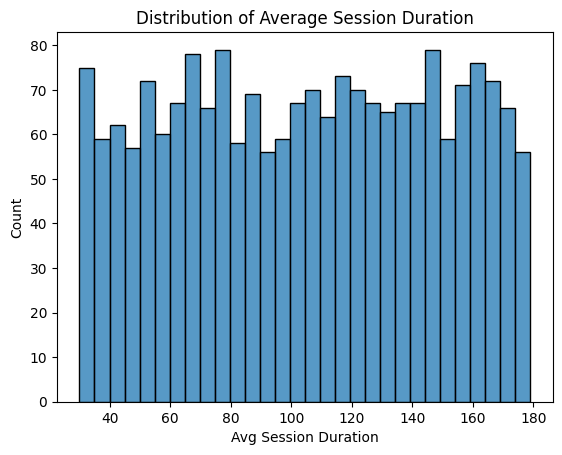

In [10]:
#Avg Session Duration
plt.figure()
sns.histplot(df['Avg Session Duration'], bins=30)
plt.title("Distribution of Average Session Duration")
plt.show()


#### Majority of sessions fall in lower duration ranges, with a few long sessions indicating highly engaged users.

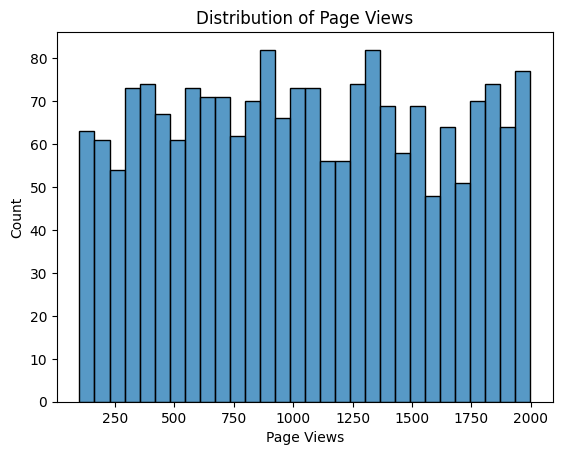

In [11]:
#page views
plt.figure()
sns.histplot(df['Page Views'], bins=30)
plt.title("Distribution of Page Views")
plt.show()


#### Page views are right-skewed, showing that most users view fewer pages per session.

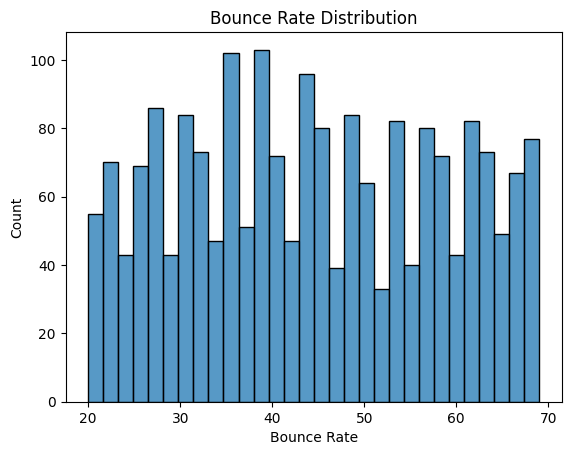

In [12]:
#Bounce rate
plt.figure()
sns.histplot(df['Bounce Rate'], bins=30)
plt.title("Bounce Rate Distribution")
plt.show()


#### High bounce rates for a large portion of sessions indicate opportunities for UX improvement.

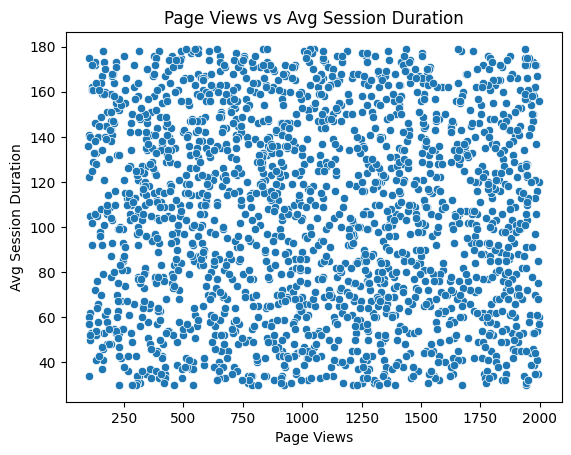

In [13]:
#Page Views vs Session Duration
plt.figure()
sns.scatterplot(
    x=df['Page Views'],
    y=df['Avg Session Duration']
)
plt.title("Page Views vs Avg Session Duration")
plt.show()


#### Sessions with higher page views generally have longer session durations, indicating deeper engagement.

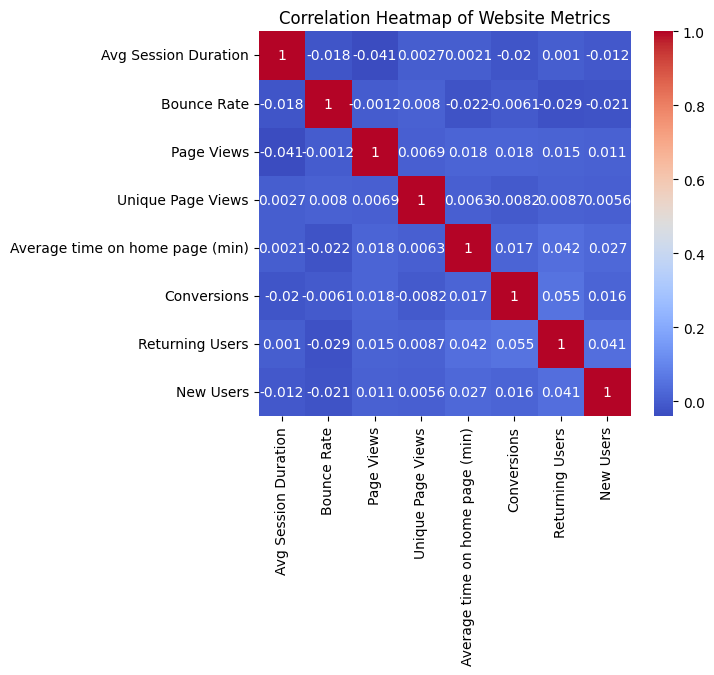

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[[
        'Avg Session Duration',
        'Bounce Rate',
        'Page Views',
        'Unique Page Views',
        'Average time on home page (min)',
        'Conversions',
        'Returning Users',
        'New Users'
    ]].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap of Website Metrics")
plt.show()


### FEATURE ENGINEERING

In [15]:
features = df[[
    'Avg Session Duration',
    'Bounce Rate',
    'Page Views',
    'Unique Page Views',
    'Average time on home page (min)',
    'Conversions',
    'Returning Users',
    'New Users'
]]


##### These features represent user engagement, interaction depth, and conversion behavior.

In [16]:
features.isnull().sum()


Avg Session Duration               0
Bounce Rate                        0
Page Views                         0
Unique Page Views                  0
Average time on home page (min)    0
Conversions                        0
Returning Users                    0
New Users                          0
dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


###### Feature scaling is required because K-Means is distance-based and sensitive to different feature scales.

### K-MEANS CLUSTERING

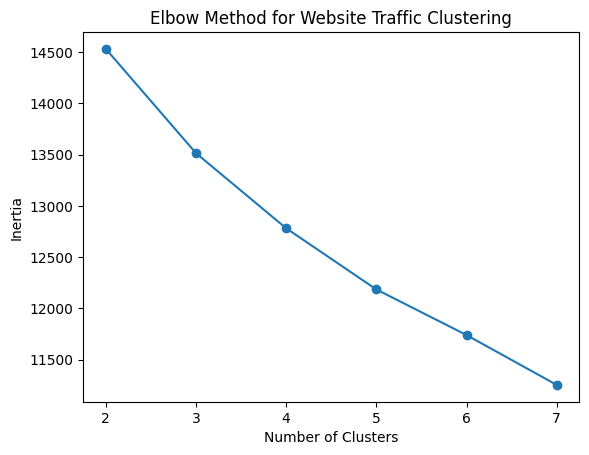

In [18]:


inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Website Traffic Clustering")
plt.show()


In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


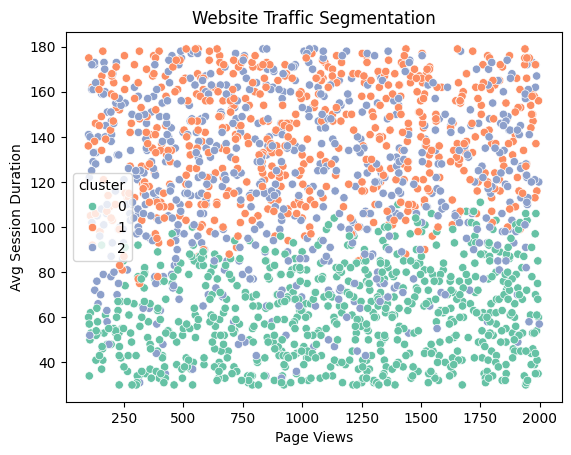

In [20]:
import seaborn as sns

sns.scatterplot(
    x=df['Page Views'],
    y=df['Avg Session Duration'],
    hue=df['cluster'],
    palette='Set2'
)

plt.title("Website Traffic Segmentation")
plt.xlabel("Page Views")
plt.ylabel("Avg Session Duration")
plt.show()


#### The scatter plot shows clear separation of website traffic into three engagement-based clusters. Cluster 0 represents low-engagement users with shorter session durations, Cluster 1 represents highly engaged users with longer session durations, and Cluster 2 captures moderate engagement behavior. This segmentation enables targeted optimization strategies for different user groups.

In [22]:
import os

# Ensure the folder exists
os.makedirs("../output", exist_ok=True)

# Now save the file
df.to_csv("../output/website_traffic_with_clusters.csv", index=False)
